In [3]:
!pip install empiricaldist
!pip install statadict

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for empiricaldist: filename=empiricaldist-0.7.2-py3-none-any.whl size=12222 sha256=7bf9a65862717f2207112e680da4aaba87ff509b988d1079735909e8380dd9d3
  Stored in directory: c:\users\administrator.dai-pc2\appdata\local\pip\cache\wheels\e1\3b\7b\9e05941453eeac3d404f25bd2afefa929395b35f6de9770be7
Successfully built empiricaldist


In [67]:
import empiricaldist
from statadict import parse_stata_dict

In [68]:
dict_file = 'GSS.dct'
data_file = 'GSS.dat.gz'

In [69]:
from statadict import parse_stata_dict
stata_dict = parse_stata_dict(dict_file)

In [70]:
import gzip
fp = gzip.open(data_file)

In [71]:
import pandas as pd
gss = pd.read_fwf(fp, names=stata_dict.names, colspecs=stata_dict.colspecs)
print(gss.shape)
print(gss.head())

(64814, 8)
   YEAR  ID_  AGE  EDUC  GENDER  GUNLAW  GRASS  REALINC
0  1972    1   23    16       2       1      0  18951.0
1  1972    2   70    10       1       1      0  24366.0
2  1972    3   48    12       2       1      0  24366.0
3  1972    4   27    17       2       1      0  30458.0
4  1972    5   61    12       2       1      0  50763.0


In [62]:
print(gss['EDUC'].value_counts().sort_index())

EDUC
0       165
1        47
2       152
3       257
4       319
5       402
6       828
7       879
8      2724
9      2083
10     2880
11     3743
12    19663
13     5360
14     7160
15     2910
16     8355
17     1967
18     2384
19      920
20     1439
98       73
99      104
Name: count, dtype: int64


In [85]:
educ = gss['EDUC'].replace([98, 99], np.nan)

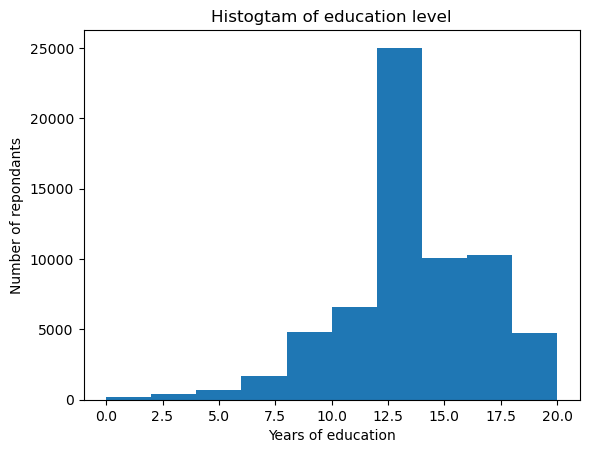

In [86]:
# Visualise it
import matplotlib.pyplot as plt
educ.hist(grid=False)
plt.xlabel('Years of education')
plt.ylabel('Number of repondants')
plt.title('Histogtam of education level')
plt.show()

In [87]:
from empiricaldist import Pmf
pmf_educ = Pmf.from_seq(educ, normalize=False)
print(type(pmf_educ))
print(pmf_educ.head())
print(pmf_educ.tail())
print(pmf_educ[20])

<class 'empiricaldist.empiricaldist.Pmf'>
EDUC
0.0    165
1.0     47
2.0    152
Name: count, dtype: int64
EDUC
18.0    2384
19.0     920
20.0    1439
Name: count, dtype: int64
1439


In [88]:
pmf_educ_norm = Pmf.from_seq(educ, normalize=True)
print(pmf_educ_norm.head())
print(pmf_educ[12])

EDUC
0.0    0.002553
1.0    0.000727
2.0    0.002352
Name: proportion, dtype: float64
19663


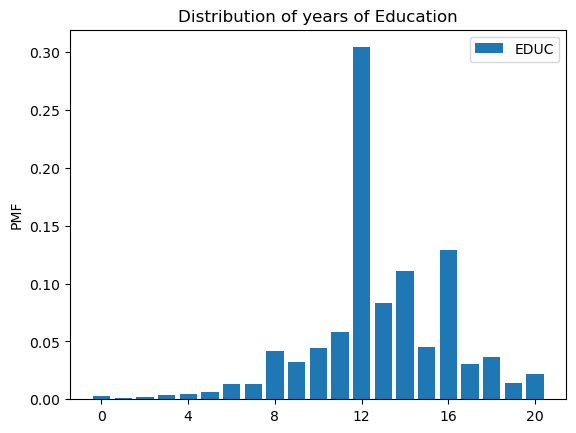

In [89]:
pmf_educ_norm.bar(label='EDUC')
plt.xticks(range(0, 21, 4))
plt.ylabel('PMF')
plt.title('Distribution of years of Education')
plt.legend();
plt.show()

### Now CDF 

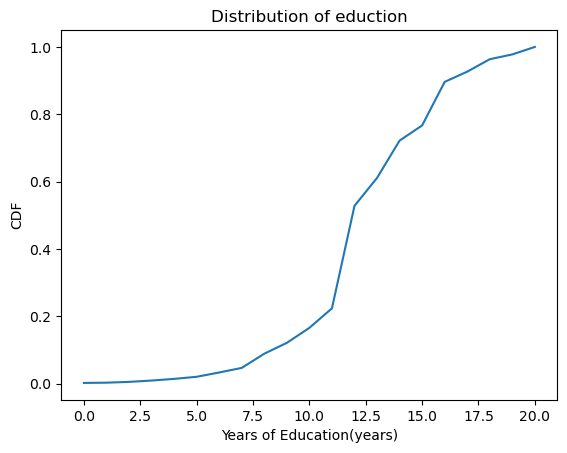

In [90]:
from empiricaldist import Cdf
educ = gss['EDUC'].replace([98, 99], np.nan)
cdf_educ = Cdf.from_seq(educ)
cdf_educ.plot()
plt.xlabel("Years of Education(years)")
plt.ylabel('CDF')
plt.title('Distribution of eduction')
plt.show()
# The x-axix is the education levels, from 1 to 20. The y-axis is the cumulative probabilites, from 0 to 1.

*****************
0        23.0
1        70.0
2        48.0
3        27.0
4        61.0
         ... 
64809    37.0
64810    75.0
64811    67.0
64812    72.0
64813    79.0
Name: AGE, Length: 64814, dtype: float64


<Axes: xlabel='AGE'>

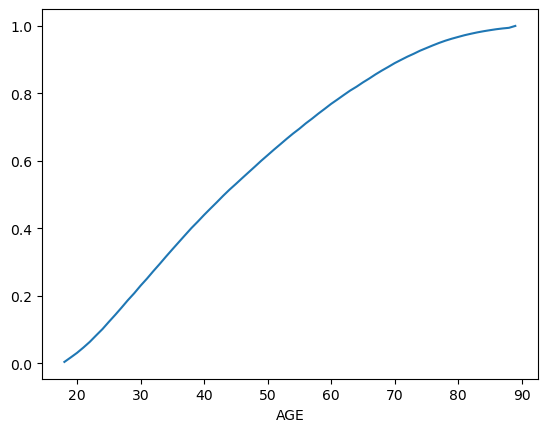

In [96]:
age = gss['AGE'].replace([98, 99], np.nan)
print ("*****************")
print(age)

cdf_age = Cdf.from_seq(age)

cdf_age.plot()

In [97]:
# We can also obtain the cumulative probability up to a certain point, e.g. age 51;
q = 51
p = cdf_age(q)
print(p)
# about 63% of the respondents are 51 years old or younger

0.6331867587402843


In [98]:
# Inversly find the age at a certain value of cumulative probability/
p1 = 0.25
q1 = cdf_age.inverse(p1)
print(q1)
# 25% of the respondents are age 31 or less. Another way to say the same thing is "age"

31.0


In [99]:
# We can now use 75th percentile to find IQR
p3 = 0.75
q3 = cdf_age.inverse(p3)
print(q3)
print(q3-q1)

59.0
28.0


Q!: 31.0, Q3: 59.0


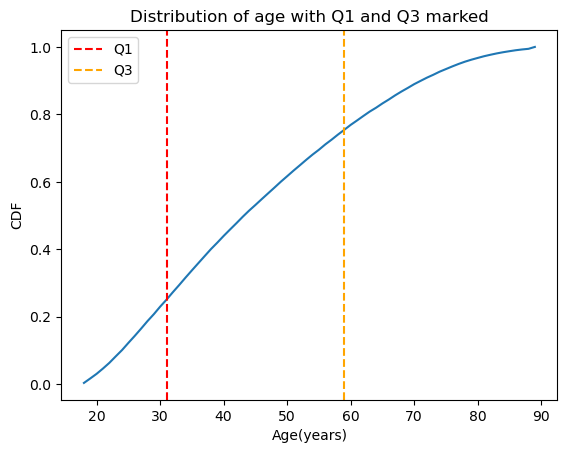

In [100]:
print(f"Q!: {q1}, Q3: {q3}")
cdf_age = empiricaldist.Cdf.from_seq(age)
cdf_values = cdf_age.values
data_points = cdf_age.index
plt.plot(data_points, cdf_values)
plt.axvline(x=q1, color='red', linestyle='--', label='Q1')
plt.axvline(x=q3, color='orange', linestyle='--', label='Q3')
plt.xlabel('Age(years)')
plt.ylabel('CDF')
plt.title("Distribution of age with Q1 and Q3 marked")
plt.legend()
plt.show()

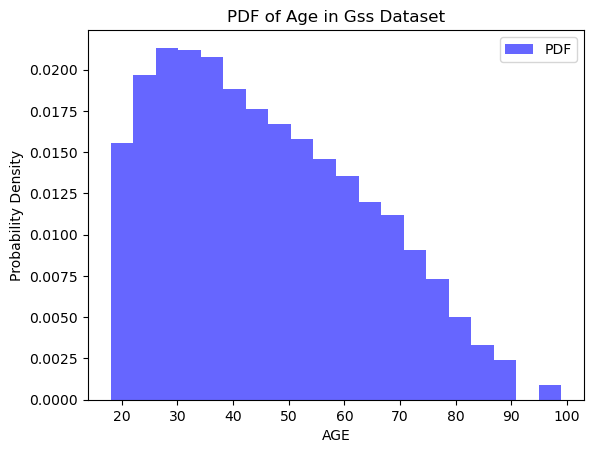

In [101]:
# Kernel Density Estimation or PDF
age_data = gss["AGE"]

# Create a histogram to visualize the PDF
plt.hist(age_data, bins=20, density=True, alpha=0.6, color="b", label='PDF')
plt.xlabel('AGE')
plt.ylabel('Probability Density')
plt.title("PDF of Age in Gss Dataset")
plt.legend()
plt.show()

In [102]:
# Corresponding PMF
pmf = age_data.value_counts(normalize=True).sort_index()

Text(0, 0.5, 'Probability')

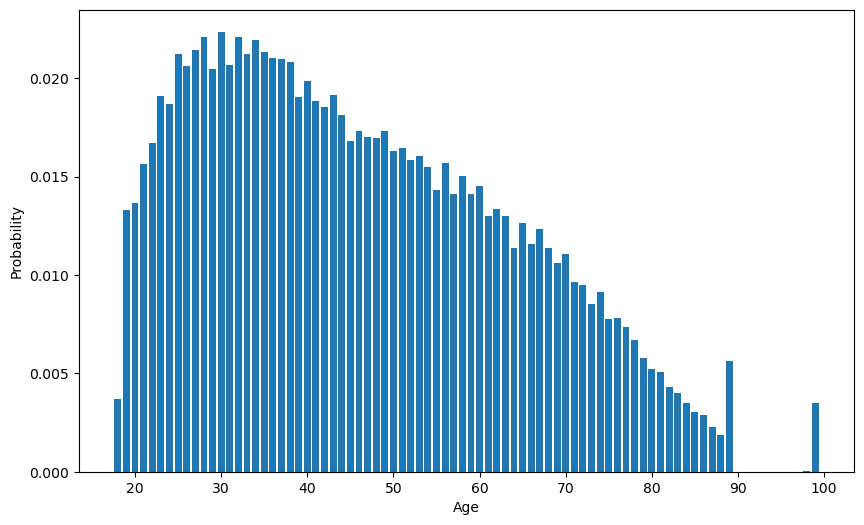

In [103]:
# Create a bar plot of the PMF
plt.figure(figsize=(10, 6))
plt.bar(pmf.index, pmf.values)
plt.xlabel('Age')
plt.ylabel('Probability')